In [1]:
import pandas as pd
chd=pd.read_csv('C:\\Users\\Admin\\Downloads\\chd_data.csv')
chd.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


Text(0.5, 1.0, 'age vs. coronary heart disease')

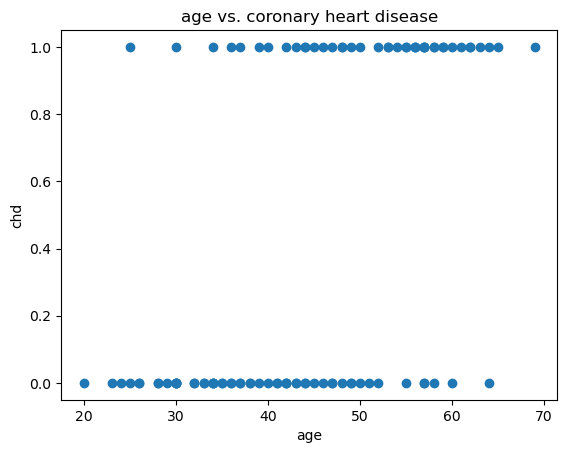

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter("age","chd",data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("age vs. coronary heart disease")

In [4]:
from sklearn.model_selection import train_test_split
predictors=["age"]
target="chd"
x=chd[predictors]
y=chd[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (70, 1)
shape of y_train: (70,)
shape of x_test: (30, 1)
shape of y_test: (30,)


In [5]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
print("intercept:",model.intercept_,"\ncoefficients:",model.coef_)

intercept: [-5.65118929] 
coefficients: [[0.11144281]]


In [40]:
test=np.array([29]).reshape(1,-1)
print("predicted probability for class '0' and '1' respectively:",model.predict_proba(test))
print("\npredicted target i.e. 'chd' value:",model.predict(test))


NameError: name 'np' is not defined

In [15]:
print("accuracy score of the model on training data:",model.score(x_train,y_train))
print("accuracy score of the model on test data:",model.score(x_test,y_test))

accuracy score of the model on training data: 0.7428571428571429
accuracy score of the model on test data: 0.7333333333333333


# Logistic  Regression on Credit Risk data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
credit_data=pd.read_csv('C:\\Users\\Admin\\Downloads\\credit_risk.csv')
credit_data

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [44]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [46]:
credit_data['class'].unique()

array(['good', 'bad'], dtype=object)

In [48]:
x=credit_data.columns.drop("class")
y=credit_data['class']
credit_data_encoded=pd.get_dummies(credit_data[x])
credit_data_encoded.shape

(1000, 61)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(credit_data_encoded,y,test_size=0.15,random_state=100)
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (850, 61)
shape of y_train: (850,)
shape of x_test: (150, 61)
shape of y_test: (150,)


In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
train_accuracy=model.score(x_train,y_train)
print("train accuracy=",train_accuracy)
trst_accuracy=model.score(x_test,y_test)
print("test accuracy=",test_accuracy)

train accuracy= 0.7752941176470588
test accuracy= 0.7752941176470588


In [62]:
train_predictions=model.predict(x_train)
test_predictions=model.predict(x_test)
from sklearn.metrics import confusion_matrix
train_conf_matrix=confusion_matrix(y_train,train_predictions)
pd.DataFrame(train_conf_matrix,columns=model.classes_,index=model.classes_)

,bad,good
bad,125,132
good,59,534


In [73]:
train_correct_predictions=train_conf_matrix[0][0]+train_conf_matrix[1][1]
train_total_predictions=train_conf_matrix.sum()
train_accuracy=train_correct_predictions/train_total_predictions
print(train_accuracy)

0.7752941176470588


In [74]:
test_correct_predictions=test_conf_matrix[0][0]+test_conf_matrix[1][1]
total_predictions=test_conf_matrix.sum()
test_accuracy=test_correct_predictions/total_predictions
print(test_accuracy)

NameError: name 'test_conf_matrix' is not defined

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

         bad       0.56      0.44      0.49        43
        good       0.79      0.86      0.83       107

    accuracy                           0.74       150
   macro avg       0.68      0.65      0.66       150
weighted avg       0.73      0.74      0.73       150

